# Statistics of AotM-2011 Dataset

In [1]:
%matplotlib inline
import os, sys
import json, gzip, codecs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data_dir = 'data/aotm-2011'

In [3]:
fname = os.path.join(data_dir, 'aotm2011_playlists.json.gz')
reader = codecs.getreader("utf-8")
with gzip.open(fname, 'r') as fd:
    playlists = json.load(reader(fd))

In [4]:
#playlists[0]

In [5]:
lengths = [len(playlists[j]['playlist']) for j in range(len(playlists))]

In [6]:
print('#Playlists:', len(lengths))

#Playlists: 101343


Histogram of playlist length.

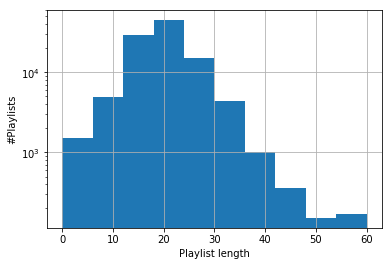

In [7]:
ax = plt.subplot(111)
pd.Series(lengths).hist(ax=ax)
ax.set_xlabel('Playlist length')
ax.set_ylabel('#Playlists')
ax.set_yscale('log')

Categories.

In [8]:
cats = [playlists[j]['category'] for j in range(len(playlists))]

In [9]:
print('#Categories:', np.unique(cats).shape[0])

#Categories: 43


In [10]:
counter = Counter(cats)

In [11]:
#counter

In [12]:
X = sorted([key for key in counter])
Y = [counter[key] for key in X]

Scatter plot of the number of playlists for all categories.

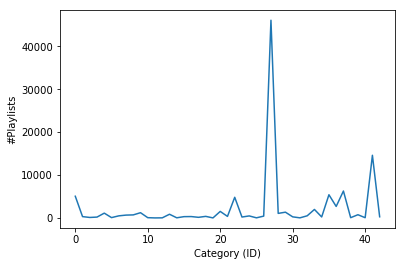

In [13]:
ax = plt.subplot(111)
ax.set_xlabel('Category (ID)')
ax.set_ylabel('#Playlists')
#ax.set_yscale('log')
ax.plot(Y)

Playlists in which all tracks are in MSD.

In [14]:
subset_ix = [j for j in range(len(playlists)) \
             if len(playlists[j]['playlist']) == len([x for y in playlists[j]['filtered_lists'] for x in y])]

In [15]:
#len(subset_ix)

In [16]:
#playlists[subset_ix[0]]

### Check multiple ground truth

Assume query is:
- `query = (start_song, length)`
- `query = (start_song, length, user)`

In [17]:
query_dict1 = dict()
query_dict2 = dict()

In [18]:
for ix in range(len(playlists)):
    playlist = playlists[ix]['playlist']
    if len(playlist) == 0: continue
    
    track0_name = str.upper(playlist[0][0][1])
    user_name = str.upper(playlists[ix]['user']['name'])
    ntracks = len(playlists[ix]['playlist'])
    
    q1 = (track0_name, ntracks)
    q2 = (track0_name, ntracks, user_name)
    try:
        query_dict1[q1].append(ix)
    except KeyError:
        query_dict1[q1] = [ix]
    try:
        query_dict2[q2].append(ix)
    except KeyError:
        query_dict2[q2] = [ix]

In [19]:
#query_dict1

In [20]:
#query_dict2

queries with multiple ground truths.

In [21]:
queries1 = sorted([q1 for q1 in query_dict1 if len(query_dict1[q1]) > 1])

In [22]:
print('query = (start_song, length)')
print('Queries with multiple ground truth: %d/%d, ratio: %.2f%%' % \
      (len(queries1), len(query_dict1), 100*len(queries1) / len(query_dict1)))

query = (start_song, length)
Queries with multiple ground truth: 7390/90828, ratio: 8.14%


In [23]:
queries2 = sorted([q2 for q2 in query_dict2 if len(query_dict2[q2]) > 1])

In [24]:
print('query = (start_song, length, user)')
print('Queries with multiple ground truth: %d/%d, ratio: %.2f%%' % \
      (len(queries2), len(query_dict2), 100*len(queries2) / len(query_dict2)))

query = (start_song, length, user)
Queries with multiple ground truth: 933/100128, ratio: 0.93%
